In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

In [3]:
filename = '108-42.aiff'

# Load in via `librosa`
samples, sr = librosa.load(filename, mono=False)

# Create Musical Phrase

From the paper, we're measuring this:

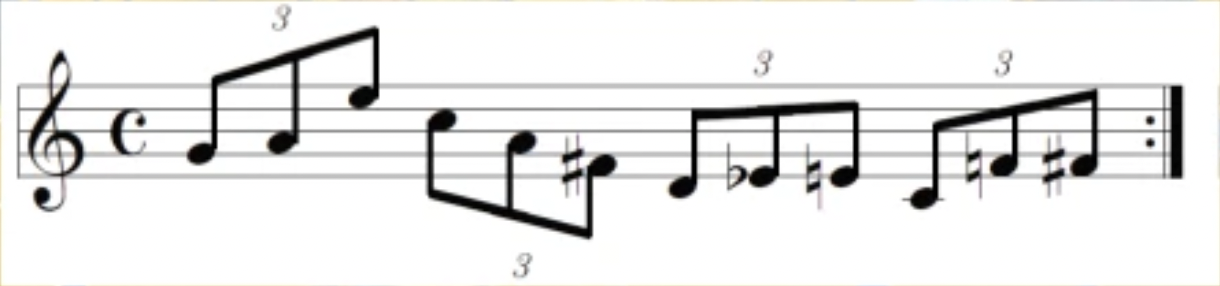

Text(0, 0.5, 'Freq (Hz)')

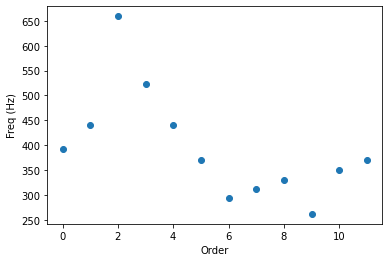

In [4]:
phrase = ["G4", "A4", "E5", 
          'C5', 'A4', 'F#4',
          'D4', 'Eb4', 'E4',
          'C4',  'F4',  'F#4']
phrase_hz = librosa.note_to_hz(phrase)

notes_dict = dict(zip(phrase, phrase_hz))

plt.scatter(range(len(phrase_hz)), phrase_hz)
plt.xlabel('Order')
plt.ylabel('Freq (Hz)')

# STSF

In [5]:
from scipy import signal

In [6]:
# VARIABLES
nperseg = 4500

channel = 2
t_i = 0
t_f = None
if t_f == None:
    t_f = sr * channel

    
# Setup
fs = sr
target_range = slice(t_i * fs ,t_f * fs)
x = samples[channel - 1][target_range]

# Run STFT
f, t, Zxx = signal.stft(x, fs, nperseg=nperseg)

print(np.abs(Zxx).min(), np.abs(Zxx).max(), np.abs(Zxx).mean())
print(np.diff(t)[0])

3.846169e-14 0.03019345 8.1368526e-05
0.10204081632653061


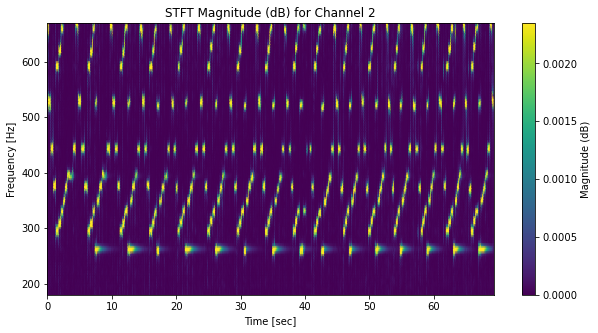

In [7]:
# VARIABLES
vmin = 0
vmax = np.abs(Zxx.max()) / 10
freq_min = 180 # in Hz, (196Hz is G3)
freq_max = 670 # in Hz, (659.3Hz is E5)

# Plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=vmin, vmax=vmax, shading='gouraud')
plt.ylim([freq_min,freq_max])
plt.title(f'STFT Magnitude (dB) for Channel {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Magnitude (dB)')

In [8]:
print(Zxx.shape)
len(f), len(t)

(2251, 680)


(2251, 680)

In [9]:
f[140], f[40]

(685.9999999999999, 195.99999999999997)

In [10]:
tf_mag = np.abs(Zxx.T)
peak_freqs = np.array([f[int(np.argmax(tf_mag[time][40:140]))] for time in range(len(tf_mag))])

In [11]:
# Convert notes_dict to a numpy array of frequencies
note_freqs = np.array(list(notes_dict.values()))

# Compute the absolute differences between all note frequencies and all peak frequencies
abs_diffs = np.abs(note_freqs[:, np.newaxis] - peak_freqs)

# Find the index of the minimum absolute difference for each peak frequency
min_indices = np.argmin(abs_diffs, axis=0)

# Get the closest note and frequency for each peak frequency
closest_notes = np.array(list(notes_dict.keys()))[min_indices]
closest_freqs = note_freqs[min_indices]

(0.0, 100.0)

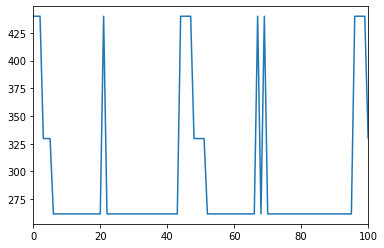

In [15]:
plt.plot(closest_freqs)
plt.xlim([0,100])

# Librosa STFT

In [ ]:
channel = 2


S = np.abs(librosa.stft(samples[channel], win_length = 14))

In [ ]:
t_total = len(samples[9])/sr
S_sr = len(S) / t_total
.1 * S_sr

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_ylim([freq_min, freq_max])